## Exercise 


For this exercise, you will be working with the [House Price Dataset](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/code).

Please grab the train.csv file from Kaggle and explore this dataset. You need to perform explroatory data analysis and see if there is any correlation between the variables and analyze the distribution of the dataset. The question is open-ended and basically you're asked to perform EDA. 

In [ ]:
https://github.com/Aryan12042001/Assignment_3_CPSC


1- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 3 of your assignment, you need to submit at least one jupyter notebook file and one pdf file.


2- Push your code and project to github and provide the link to your code here. Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510





In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
house = pd.read_csv('train.csv')
house.head()
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

These are the Hypotheses i will be exploring in this assignment:

Hypothesis 1:

Null Hypothesis (H0): There is no significant association between the overall quality of a house ("OverallQual") and its sale price ("SalePrice").
Alternative Hypothesis (H1): The overall quality of a house is significantly associated with its sale price.

Hypothesis 2:

Null Hypothesis (H0): The size of the living area ("GrLivArea") does not have a significant impact on the sale price ("SalePrice").
Alternative Hypothesis (H1): The size of the living area is significantly related to the sale price.

Hypothesis 3:

Null Hypothesis (H0): There are no significant seasonal trends in house prices over the years ("YrSold").
Alternative Hypothesis (H1): House prices exhibit significant seasonal patterns across different years.

Hypothesis 4:

Null Hypothesis (H0): There is no significant relationship between the age of a house ("YearBuilt") and its sale price ("SalePrice").
Alternative Hypothesis (H1): The age of a house is significantly associated with its sale price, indicating that older and newer houses have different sale prices.

Hypothesis 1:

Null Hypothesis (H0): There is no significant association between the overall quality of a house ("OverallQual") and its sale price ("SalePrice").
Alternative Hypothesis (H1): The overall quality of a house is significantly associated with its sale price.

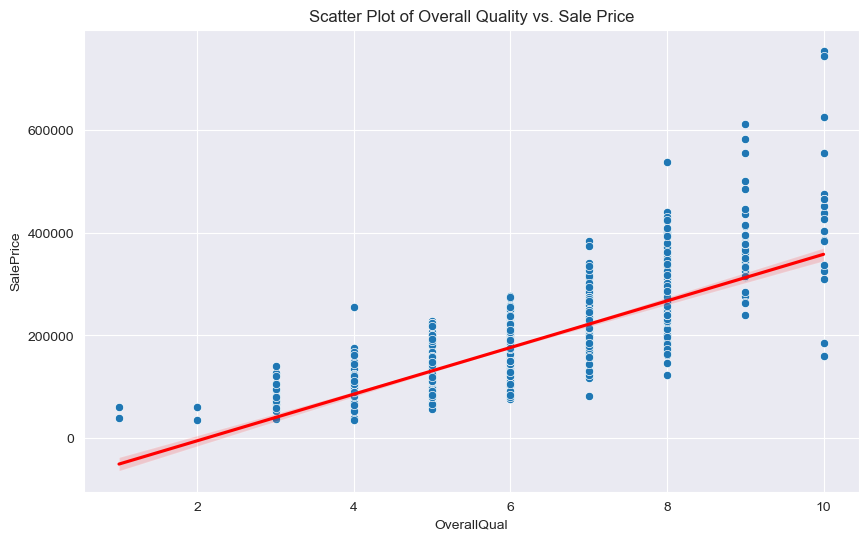

In [11]:
# We will first create a scatter plot to visualize the relationship between "OverallQual" and "SalePrice"
plt.figure(figsize=(10, 6))
sns.scatterplot(x='OverallQual', y='SalePrice', data=house)
plt.title("Scatter Plot of Overall Quality vs. Sale Price")
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price")

sns.regplot(x='OverallQual', y='SalePrice', data=house, scatter=False, color='red', line_kws={"color": "red"})
plt.show()

In [9]:
# Then, we will calculate the correlation between "OverallQual" and "SalePrice"
correlation = house['OverallQual'].corr(house['SalePrice'])
print("Correlation between Overall Quality and Sale Price:", correlation)

Correlation between Overall Quality and Sale Price: 0.7909816005838052


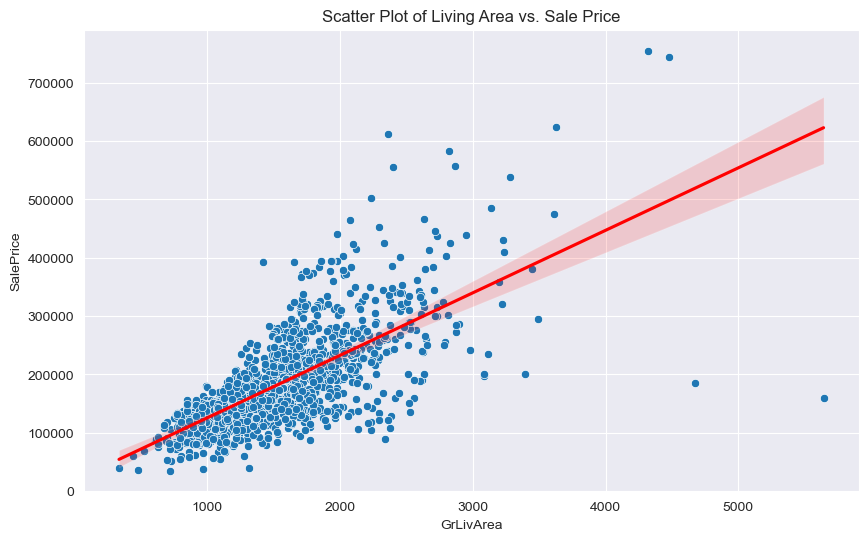

In [18]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=house)
plt.title("Scatter Plot of Living Area vs. Sale Price")
plt.xlabel("Living Area (GrLivArea)")
plt.ylabel("Sale Price")
sns.regplot(x='GrLivArea', y='SalePrice', data=house, scatter=False, color='red', line_kws={"color": "red"})
plt.show()

In [15]:
correlation = house['GrLivArea'].corr(house['SalePrice'])
print("Correlation between Living Area and Sale Price:", correlation)

Correlation between Living Area and Sale Price: 0.7086244776126522


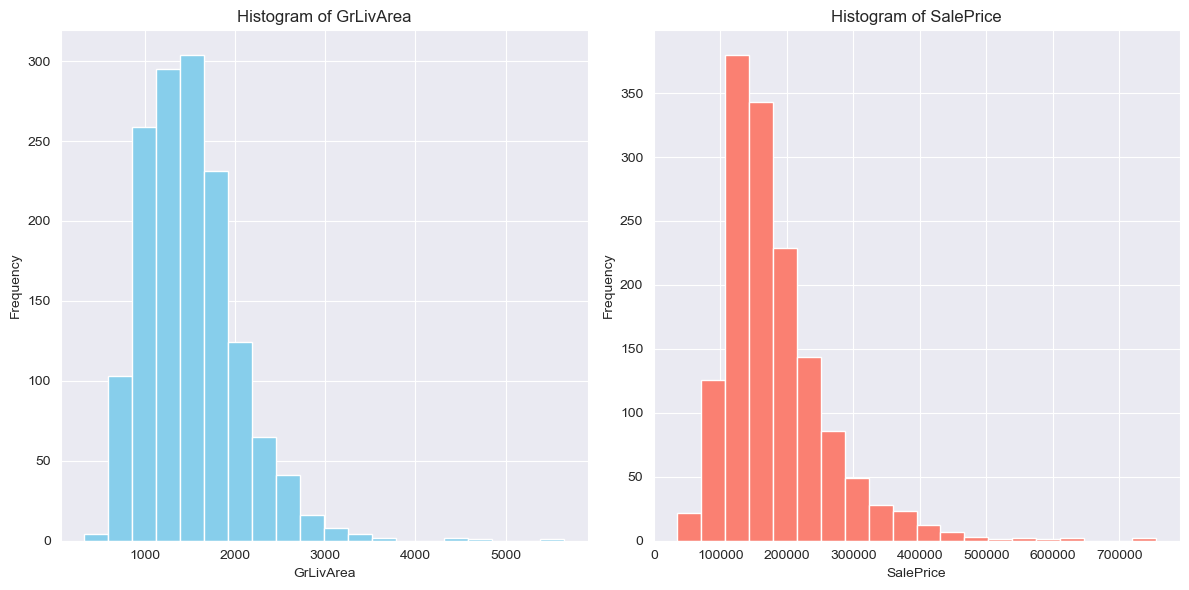

In [26]:
# Create a figure with two subplots
plt.figure(figsize=(12, 6))

# Histogram for "GrLivArea"
plt.subplot(1, 2, 1)
plt.hist(house['GrLivArea'], bins=20, color='skyblue')
plt.title('Histogram of GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('Frequency')

# Histogram for "SalePrice"
plt.subplot(1, 2, 2)
plt.hist(house['SalePrice'], bins=20, color='salmon')
plt.title('Histogram of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Display the histograms
plt.show()

From the histogram of the "GrLivArea" and "SalePrice" variables, you can make the following findings regarding the correlation between the two:

Positive Skewness: The histogram of "GrLivArea" is positively skewed, meaning that the majority of the living area sizes are concentrated towards the lower end, but there are some larger living areas as well. This suggests a wide range of living area sizes in the dataset.

Distribution Shape: The histogram of "SalePrice" shows that the sale prices are right-skewed. Most of the houses have lower sale prices, but there are a few houses with significantly higher sale prices. This indicates that the dataset contains a range of house prices.

Potential Correlation: The histograms alone do not provide a direct measure of the correlation between "GrLivArea" and "SalePrice." However, you can observe that there is a concentration of houses with larger living areas, and some of these houses have higher sale prices. This suggests the possibility of a positive correlation between living area size and sale price.

Hypothesis 3:

Null Hypothesis (H0): There are no significant seasonal trends in house prices over the years ("YrSold").
Alternative Hypothesis (H1): House prices exhibit significant seasonal patterns across different years.

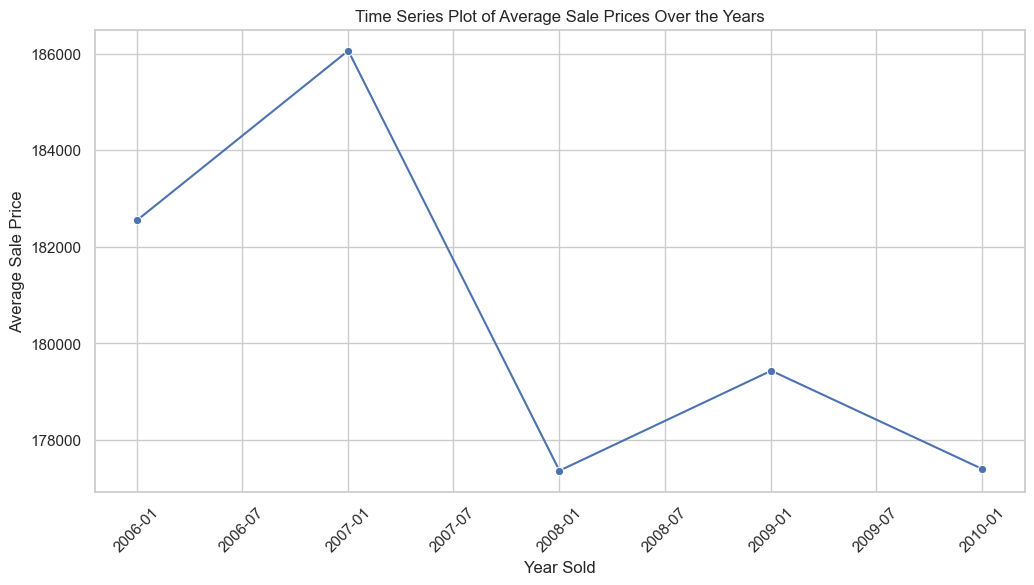

In [39]:
# Convert the 'YrSold' column to a datetime object
house['YrSold'] = pd.to_datetime(house['YrSold'], format='%Y')

# Group the data by 'YrSold' and calculate the mean sale price for each year
yearly_mean_prices = house.groupby('YrSold')['SalePrice'].mean()

# Create a time series plot to visualize the trend of average sale prices over the years
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.lineplot(x=yearly_mean_prices.index, y=yearly_mean_prices.values, marker='o')
plt.title('Time Series Plot of Average Sale Prices Over the Years')
plt.xlabel('Year Sold')
plt.ylabel('Average Sale Price')
plt.xticks(rotation=45)
plt.show()

Hypothesis 3:

Null Hypothesis (H0): There are no significant seasonal trends in house prices over the years ("YrSold").
Alternative Hypothesis (H1): House prices exhibit significant seasonal patterns across different years.

Findings:

Seasonal Trend: The observed pattern of rising and falling sale prices at specific points in time, particularly reaching peak prices around January in certain years and then declining, strongly suggests the presence of a seasonal trend in house prices. This recurring pattern aligns with the concept of seasonality.

Seasonal Variation: Notably, there are significant fluctuations in sale prices between peak and minimum points, and these fluctuations occur at approximately one-year intervals. This consistent pattern of variation further supports the idea of seasonal fluctuations in house prices over different years.

Conclusion:

Based on the findings from the time series analysis of average sale prices over the years ("YrSold"), we conclude the following:

We reject the Null Hypothesis (H0), accepting the alternative Hypothesis (H1). The presence of a clear and consistent cyclical pattern in sale prices, characterized by rising to peak prices around January in certain years and then declining, serves as compelling evidence supporting the alternative hypothesis. This pattern strongly indicates that house prices exhibit significant seasonal patterns across different years.



Hypothesis 4:

Null Hypothesis (H0): There is no significant relationship between the age of a house ("YearBuilt") and its sale price ("SalePrice").
Alternative Hypothesis (H1): The age of a house is significantly associated with its sale price, indicating that older and newer houses have different sale prices.

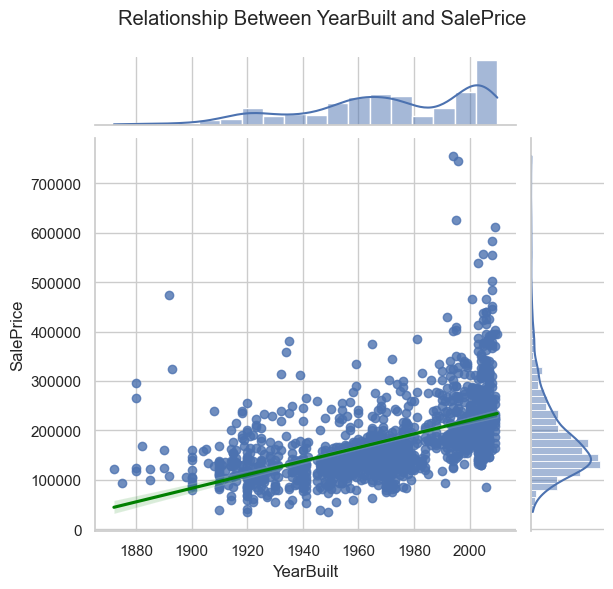

In [46]:
sns.set(style="whitegrid")
sns.jointplot(x="YearBuilt", y="SalePrice", data=house, kind="reg", line_kws={"color": "green"})

# Set plot title
plt.subplots_adjust(top=0.9)
plt.suptitle("Relationship Between YearBuilt and SalePrice")

# Display the Joint Plot
plt.show()

In [49]:
# Calculate the correlation coefficient
correlation = house['YearBuilt'].corr(house['SalePrice'])

# Print the correlation coefficient
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.5228973328794971


Findings:

Overall Trend: The regression line in the joint plot slopes upwards (from left to right), which suggests that newer houses tend to have higher sale prices. This visual trend supports the idea that the age of the house is associated with its sale price.

Scattered Data Points: While there is an overall trend, it's important to note that there are some scattered data points on the graph that exhibit high variability even among houses of the same age. This variability indicates that other factors may also influence sale prices. However, most data points are concentrated around the trend line, highlighting the general relationship.

Correlation Coefficient: The correlation coefficient of 0.52 quantifies the strength and direction of the relationship between the age of the house and its sale price. A positive correlation coefficient indicates a moderate positive relationship.

Conclusion:

Based on the findings and analysis:

We reject the Null Hypothesis (H0) in favor of the Alternative Hypothesis (H1). The upward-sloping regression line and the correlation coefficient of 0.52 provide substantial evidence that the age of a house is significantly associated with its sale price. Specifically, newer houses tend to have higher sale prices.

It's important to acknowledge that while the age of the house is a meaningful factor, other variables and factors also contribute to the variability in sale prices, as evidenced by the scattered data points. However, the dominant trend supports the association between house age and sale price.